In [1]:
#import the dpendencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Metric&amp;APPID=794b62790c6a6063167438106ea22a15


In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

&lt;zip at 0x7fe6dd935410&gt;

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

d 19 of Set 4 | shingu
Processing Record 20 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 21 of Set 4 | newport
Processing Record 22 of Set 4 | cherskiy
Processing Record 23 of Set 4 | port elizabeth
Processing Record 24 of Set 4 | vapnyarka
Processing Record 25 of Set 4 | east london
Processing Record 26 of Set 4 | saint-pierre
Processing Record 27 of Set 4 | tiksi
Processing Record 28 of Set 4 | jumla
Processing Record 29 of Set 4 | christchurch
Processing Record 30 of Set 4 | cam pha
City not found. Skipping...
Processing Record 31 of Set 4 | san patricio
Processing Record 32 of Set 4 | hermanus
Processing Record 33 of Set 4 | richards bay
Processing Record 34 of Set 4 | fortuna
Processing Record 35 of Set 4 | chapais
Processing Record 36 of Set 4 | natal
Processing Record 37 of Set 4 | zbiroh
Processing Record 38 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 39 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 40 

In [9]:
len(city_data)

566

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,-2.11,82,21,1.21,GL,2020-10-04 18:53:56
1,Hithadhoo,-0.60,73.08,28.11,75,100,3.81,MV,2020-10-04 18:53:56
2,Berdigestyakh,62.10,126.70,-2.19,98,88,2.03,RU,2020-10-04 18:53:56
3,Punta Arenas,-53.15,-70.92,12.00,54,75,12.90,CL,2020-10-04 18:53:56
4,Albany,42.60,-73.97,15.56,62,75,1.50,US,2020-10-04 18:53:56
5,Asau,46.43,26.40,15.00,98,5,1.67,RO,2020-10-04 18:53:56
6,Mildura,-34.20,142.15,11.11,100,90,4.60,AU,2020-10-04 18:53:57
7,Sorong,-0.88,131.25,24.73,88,97,3.53,ID,2020-10-04 18:53:57
8,Wadi Musa,30.32,35.48,13.31,87,0,1.17,JO,2020-10-04 18:53:57
9,Tukrah,32.53,20.58,29.07,32,0,1.50,LY,2020-10-04 18:53:57


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2020-10-04 18:53:56,65.61,-37.64,-2.11,82,21,1.21
1,Hithadhoo,MV,2020-10-04 18:53:56,-0.60,73.08,28.11,75,100,3.81
2,Berdigestyakh,RU,2020-10-04 18:53:56,62.10,126.70,-2.19,98,88,2.03
3,Punta Arenas,CL,2020-10-04 18:53:56,-53.15,-70.92,12.00,54,75,12.90
4,Albany,US,2020-10-04 18:53:56,42.60,-73.97,15.56,62,75,1.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

&#39;10/04/20&#39;

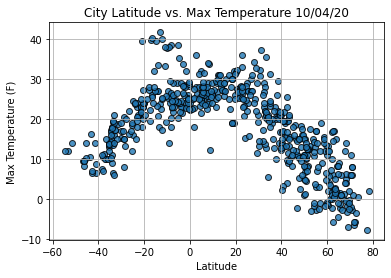

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

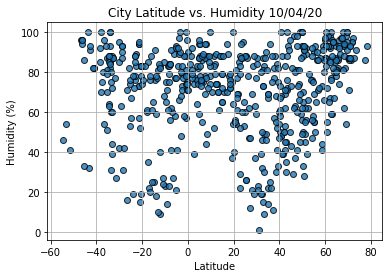

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


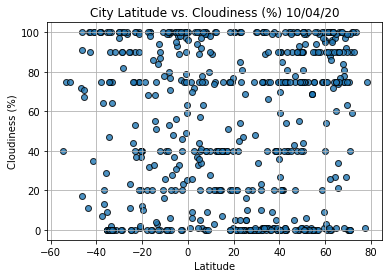

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

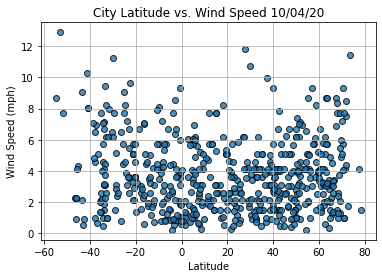

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()